# Plots

This is a work assignment given by our great micromanager.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import networkx as nx
import plotly.io as pio

## Bar Graph

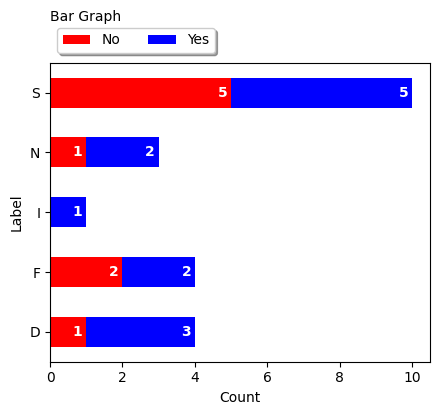

In [2]:
df = pd.read_csv('data/bar_assignment.csv')
df[df.columns[1]] = df[df.columns[1]].map({1: "Yes", 0: "No"})
df = df.groupby(df.columns[0])[df.columns[1]].value_counts().unstack(fill_value=0)

ax = df.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(4.5, 4.25))

for b in ax.patches:
    width = b.get_width()
    if width != 0:
        height = b.get_height()
        y = b.get_y()
        x = b.get_x()
        ax.text(x + width - 0.1, y + height / 2, f'{int(width)}', ha='right', va='center', fontsize=10, color='white', weight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Bar Graph', fontsize=10, loc='left', pad=30)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Label', fontsize=10)
plt.legend(ncol=2, shadow=True, loc='upper left', bbox_to_anchor=(0, 1.14), fontsize=10)
plt.tight_layout()

plt.savefig('output/bar_graph.png', dpi=500, format='png')

plt.show()

## Sankey Diagram

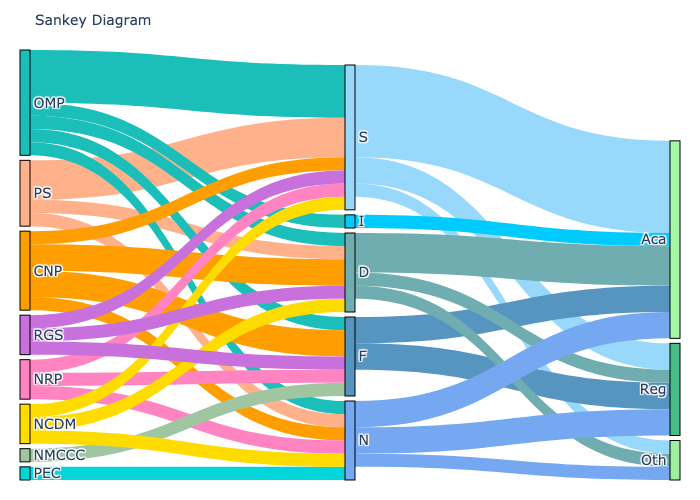

In [ ]:
df = pd.read_csv('data/sankey_assignment.csv')

source_cols = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
target_cols = ['Reg', 'Aca', 'Oth']
labels = df['LABEL'].unique()
colors = {
    'OMP': '#1bbeb9',
    'PS': '#ffb18c',
    'CNP': '#ff9e00',
    'RGS': '#c871dc',
    'NRP': '#ff84c1',
    'NCDM': '#ffdc00',
    'NMCCC': '#9fc6a0',
    'PEC': '#00d5da',
    'S': '#97d8fb',
    'I': '#00cbff',
    'D': '#70adb0',
    'F': '#5795c1',
    'N': '#75a8f1',
    'Aca': '#a4f8a8',
    'Reg': '#46bd84',
    'Oth': '#9eeea0'
}
node_label = source_cols + list(labels) + target_cols

source = []
target = []
value = []


for i, col in enumerate(source_cols):
    for j, label in enumerate(labels):
        if df.loc[df['LABEL'] == label, col].values[0] > 0:
            source.append(i)
            target.append(len(source_cols) + j)
            value.append(df.loc[df['LABEL'] == label, col].values[0])

for i, label in enumerate(labels):
    for j, col in enumerate(target_cols):
        if df.loc[df['LABEL'] == label, col].values[0] > 0:
            source.append(len(source_cols) + i)
            target.append(len(source_cols) + len(labels) + j)
            value.append(df.loc[df['LABEL'] == label, col].values[0])

chart = go.Sankey(
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[colors[node_label[i]] for i in source]
    ),
    node=dict(
        label=node_label,
        pad=5,
        thickness=10,
        color=[colors[i] for i in node_label],
        line=dict(color='black', width=1)
    )
)

fig = go.Figure(chart, layout=go.Layout(
    title=dict(text='Sankey Diagram', font=dict(size=14)),
    font=dict(size=14),
    margin=dict(l=20, r=20, t=50, b=20),
))
fig.show("png")

pio.write_image(fig, 'output/sankey_diagram.png', width=4.5*96, height=4.25*96, scale=4)

## Network Graph

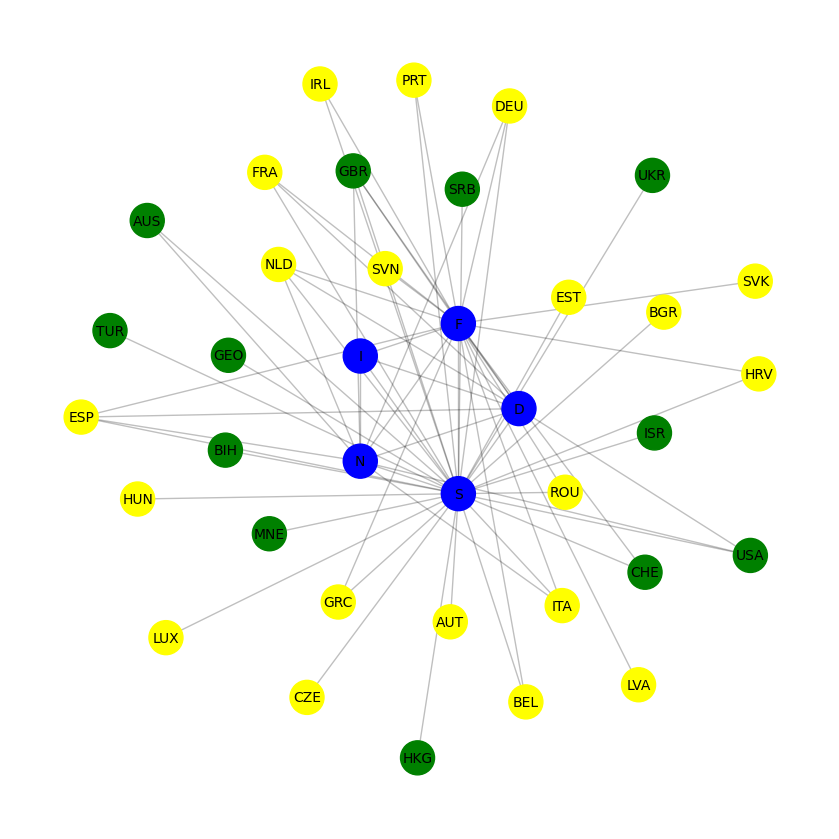

In [4]:
df = pd.read_csv('data/networks_assignment.csv')
nodes = df.columns[1:].tolist()
matrix = df.iloc[:, 1:].values

G = nx.Graph()

blue_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 
                'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

for node in nodes:
    G.add_node(node)

node_color = []

for node in G.nodes:
    if node in blue_nodes:
        node_color.append('blue')
    elif node in green_nodes:
        node_color.append('green')
    elif node in yellow_nodes:
        node_color.append('yellow')
    else:
        node_color.append('gray')

for i, row in df.iterrows():
    source = row['LABELS']
    for j, val in enumerate(row[1:]):
        if val > 0:
            target = df.columns[j+1]
            G.add_edge(source, target, weight=val)

pos = {}

for i, node in enumerate(blue_nodes):
    angle = 2 * np.pi * i / len(blue_nodes)
    pos[node] = np.array([np.cos(angle), np.sin(angle)])

outer_nodes = green_nodes + yellow_nodes
min_dist = 1
np.random.seed(69420)
for node in outer_nodes:
    while True:
        angle = np.random.uniform(0, 2*np.pi)
        radius = np.random.uniform(1.5, 4)
        new_pos = radius * np.array([np.cos(angle), np.sin(angle)])
        
        overlap = False
        for existing_pos in pos.values():
            if np.linalg.norm(new_pos - existing_pos) < min_dist:
                overlap = True
                break
        
        if not overlap:
            pos[node] = new_pos
            break

plt.figure(figsize=(8.5, 8.5))
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=600)
nx.draw_networkx_edges(G, pos, alpha=0.25)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.axis('off')
plt.tight_layout()

plt.savefig('output/network_graph.png', dpi=300, format='png')

plt.show()